In [226]:
import json
import operator
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from myutils import Complexity_Measures as cm
from myutils import Datasets as ds
from myutils import Helpers as h

#Magic Command, so changes in myutils module are reloaded
%load_ext autoreload
%autoreload 1
%aimport myutils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Classification Complexity Measures
## 1. Neural Network

In [83]:
measures = cm.get_measures()

DFS = list()
for preprocessing in measures["neuralnetwork"]:
    sub_result = dict()
    for subset in sorted(measures["neuralnetwork"][preprocessing]):
        dic = measures["neuralnetwork"][preprocessing][subset]
        l = np.array([d["test_accuracy"][-1] for d in dic])
        sub_result[subset] = dict()
        sub_result[subset][preprocessing+"_mean"] = l.mean()
        sub_result[subset][preprocessing+"_std"] = l.std()
    df = pd.DataFrame.from_dict(sub_result, orient="index")
    DFS.append(df)

df = pd.concat(DFS, axis=1)
df["Overall_mean"] = df[[col for col in df.columns if "mean" in col]].mean(axis=1)
df["Overall_std"] = df[[col for col in df.columns if "mean" in col]].std(axis=1)
#std of means 
df.loc['Total Mean',:] = df.mean(axis=0)
df


,PCA_mean,PCA_std,Autoencoder_mean,Autoencoder_std,RAW_mean,RAW_std,Overall_mean,Overall_std
"0,1",0.842238,0.216088,0.843814,0.217203,0.997006,0.002126,0.894352,0.072589
"0,2",0.796388,0.202530,0.961730,0.000000,0.715374,0.191114,0.824498,0.102519
"0,3",0.713233,0.167268,0.631156,0.174822,0.982915,0.015390,0.775768,0.150259
"0,4",0.820931,0.228741,0.828406,0.232579,0.827387,0.231888,0.825575,0.003310
"0,5",0.831909,0.070145,0.737536,0.151735,0.624288,0.142152,0.731244,0.084878
"0,6",0.937909,0.017110,0.800826,0.208703,0.949260,0.034796,0.895998,0.067457
"0,7",0.667829,0.220443,0.668825,0.221851,0.981242,0.006928,0.772632,0.147510
"0,8",0.774309,0.194640,0.802968,0.213158,0.977653,0.019305,0.851643,0.089867
"0,9",0.841126,0.081169,0.811966,0.215463,0.973018,0.026446,0.875370,0.070066
"1,2",0.837563,0.103207,0.903861,0.005656,0.992155,0.003634,0.911193,0.063324


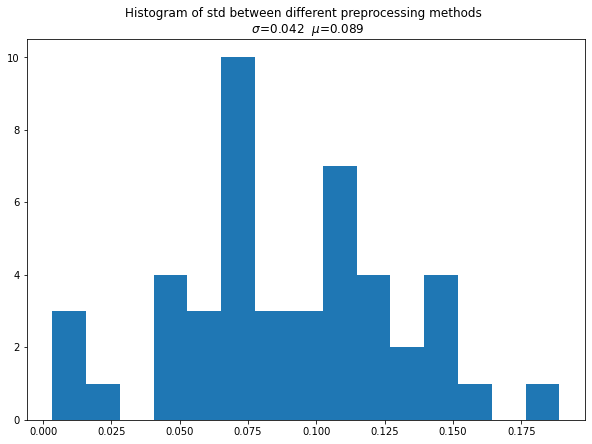

In [80]:
plt.figure(figsize=(10,7)) 
plt.title("Histogram of std between different preprocessing methods \n $\sigma$={:.3f}  $\mu$={:.3f}".format(df["Overall_std"].std(), df["Overall_std"].mean()))
plt.hist(df["Overall_std"], bins=15)
plt.show()

In [137]:
df.drop(df[df.index == "Total Mean"].index, inplace=True)
df["Overall_mean_round"] = df["Overall_mean"].round(3)
df.sort_values(by="Overall_mean", ascending=False)

,PCA_mean,PCA_std,Autoencoder_mean,Autoencoder_std,RAW_mean,RAW_std,Overall_mean,Overall_std,Overall_mean_round
"1,6",0.977863,0.001924,0.966237,0.005382,0.991559,0.004297,0.978553,0.010349,0.979
"1,7",0.952997,0.019997,0.955463,0.000577,0.989521,0.005235,0.965994,0.016667,0.966
"6,7",0.798590,0.198861,0.989090,0.000237,0.991608,0.003730,0.926429,0.090402,0.926
"1,4",0.967407,0.004676,0.778932,0.181667,0.989293,0.008764,0.911877,0.094430,0.912
"1,2",0.837563,0.103207,0.903861,0.005656,0.992155,0.003634,0.911193,0.063324,0.911
"1,5",0.937346,0.008046,0.927315,0.003807,0.839336,0.197688,0.901332,0.044029,0.901
"2,9",0.910338,0.015478,0.805488,0.212028,0.973053,0.011888,0.896293,0.069125,0.896
"0,6",0.937909,0.017110,0.800826,0.208703,0.949260,0.034796,0.895998,0.067457,0.896
"3,7",0.818940,0.133887,0.946516,0.015397,0.922473,0.079565,0.895976,0.055350,0.896
"0,1",0.842238,0.216088,0.843814,0.217203,0.997006,0.002126,0.894352,0.072589,0.894


In [188]:
df_pca = df[["PCA_mean", "PCA_std"]]
df_pca = df_pca.sort_values(by="PCA_mean", ascending=False)
#add rank to df
df_pca["type"] = "pca"
df_pca["rank"] = [i for i in range(1, len(df_pca)+1)]
df_pca.columns = ["mean", "std", "type", "rank"]

# do same for autoencoder and raw
df_ae = df[["Autoencoder_mean", "Autoencoder_std"]]
df_ae = df_ae.sort_values(by="Autoencoder_mean", ascending=False)
df_ae["type"] = "ae"
df_ae["rank"] = [i for i in range(1,     len(df_ae)+1)]
df_ae.columns = ["mean", "std", "type", "rank"]

df_join = pd.concat([df_pca, df_ae], axis=0)

In [206]:
pd.concat([df_pca, df_ae], axis=1)

,mean,std,type,rank,mean,std,type,rank
"1,6",0.977863,0.001924,pca,1,0.966237,0.005382,ae,5
"1,4",0.967407,0.004676,pca,2,0.778932,0.181667,ae,25
"6,8",0.962905,0.002547,pca,3,0.633540,0.194711,ae,33
"1,7",0.952997,0.019997,pca,4,0.955463,0.000577,ae,7
"4,7",0.944279,0.033270,pca,5,0.842620,0.002345,ae,17
"0,6",0.937909,0.017110,pca,6,0.800826,0.208703,ae,23
"1,5",0.937346,0.008046,pca,7,0.927315,0.003807,ae,12
"7,8",0.914918,0.018099,pca,8,0.659008,0.205798,ae,32
"2,9",0.910338,0.015478,pca,9,0.805488,0.212028,ae,21
"7,9",0.905089,0.003035,pca,10,0.563901,0.041935,ae,39


In [229]:
66+18

84

In [190]:
df_join = df_join.sort_index()
df_join

,mean,std,type,rank
"0,1",0.843814,0.217203,ae,16
"0,1",0.842238,0.216088,pca,18
"0,2",0.961730,0.000000,ae,6
"0,2",0.796388,0.202530,pca,30
"0,3",0.713233,0.167268,pca,36
...,...,...,...,...
"7,8",0.914918,0.018099,pca,8
"7,9",0.563901,0.041935,ae,39
"7,9",0.905089,0.003035,pca,10
"8,9",0.700118,0.135280,ae,30


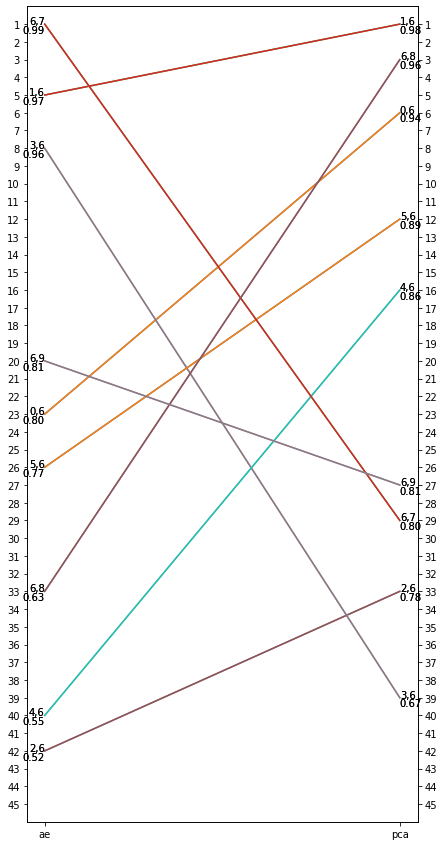

In [270]:
fig, ax = plt.subplots(figsize=(7,15))

i=0
for subset in df_join.index:
    if "6" in subset:
        temp = df_join[df_join.index == subset]
        ax.plot(temp["type"], temp["rank"], label=subset)
        plt.text("ae", temp["rank"][temp["type"] == "ae"]+0.5, "{:.2f}".format(temp["mean"][temp["type"] == "ae"][0]), ha='right')
        plt.text("ae", temp["rank"][temp["type"] == "ae"], subset, ha='right')
        plt.text("pca", temp["rank"][temp["type"] == "pca"]+0.5, "{:.2f}".format(temp["mean"][temp["type"] == "pca"][0]), ha='left')
        plt.text("pca", temp["rank"][temp["type"] == "pca"], subset, ha='left')
    i+=1


ax.set_yticks(np.arange(1, 45+1))
ax.set_ylim(46, 0)

ax2 = ax.twinx()
ax2.set_yticks(np.arange(1, 45+1))
ax2.set_ylim(46,0)

plt.show()


In [225]:
data = ds.get_preprocessed_datasets("Autoencoder","PCA")

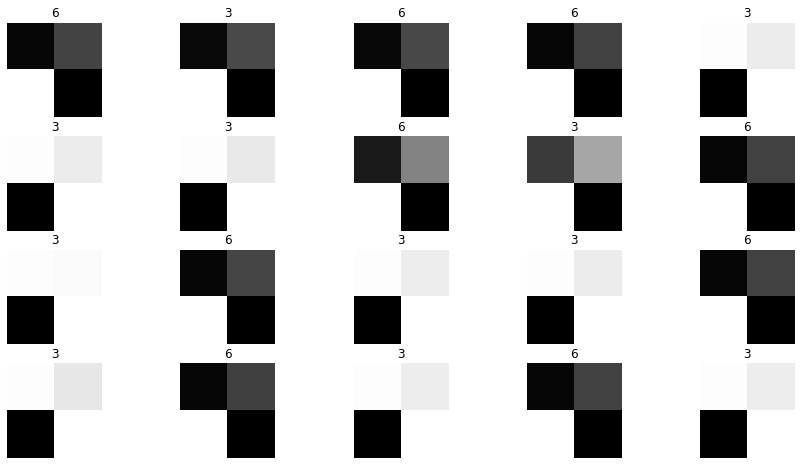

In [272]:
h.plot_grid(data["Autoencoder"]["3,6"]["x_test"], data["Autoencoder"]["3,6"]["y_test"],rows=4)

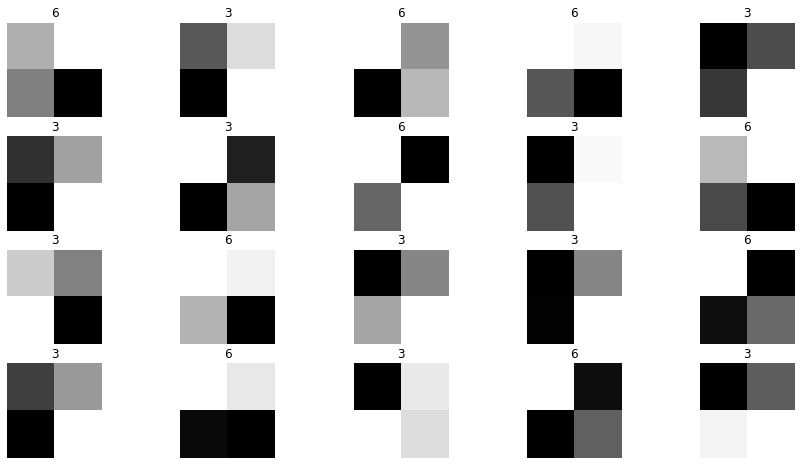

In [273]:
h.plot_grid(data["PCA"]["3,6"]["x_test"], data["PCA"]["3,6"]["y_test"],rows=4)

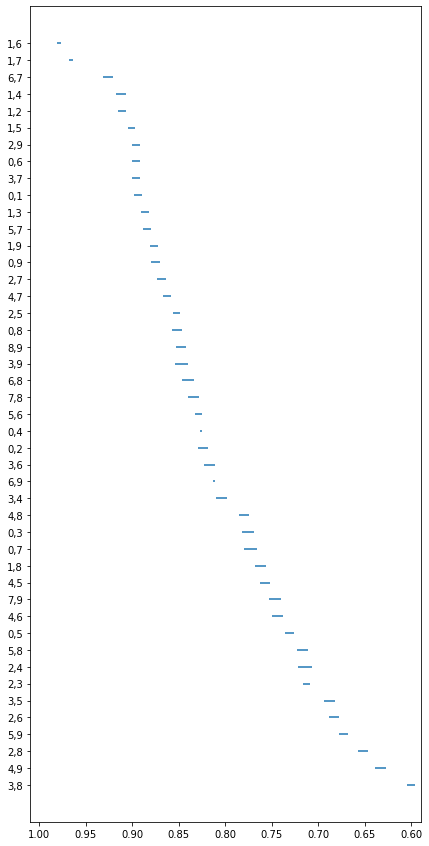

In [148]:
fig,ax = plt.subplots(figsize=(7,15))
df_plot = df.sort_values(by="Overall_mean", ascending=True)

ax.set_xlim(1.01, 0.59)
ax.scatter(df_plot["Overall_mean_round"], df_plot.index,marker="_", linestyle="None",s=df_plot["Overall_std"]*1000)
plt.show()

## 2. Fischer

In [15]:
measures = cm.get_measures()

DFS = list()
for preprocessing in measures["fischer"]:
    sub_result = dict()
    for subset in sorted(measures["fischer"][preprocessing]):
        dic = measures["fischer"][preprocessing][subset]
        sub_result[subset] = dic
    df = pd.DataFrame.from_dict(sub_result, orient="index")
    DFS.append(df)

df = pd.concat(DFS, axis=1)
df.columns = measures["fischer"].keys()
#std of means 
df.loc['Total Mean',:] = df.mean(axis=0)
df


,PCA,Autoencoder
"0,1",0.057503,0.039030
"0,2",0.144373,0.072751
"0,3",0.143591,0.236743
"0,4",0.109162,0.023850
"0,5",0.347269,0.245296
"0,6",0.194500,0.159282
"0,7",0.100306,0.099692
"0,8",0.134923,0.090148
"0,9",0.120723,0.095605
"1,2",0.163630,0.193069
